In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas_datareader import data as wb

In [138]:
from datetime import datetime

In [139]:
from __future__ import division 

In [140]:
sns.set_style('whitegrid')

In [142]:
tech = ['TCS.BO','INFY.BO','MINDTREE.BO','WIPRO.BO']
stocks = {stock:wb.DataReader(stock,data_source='yahoo',start='2017-01-02',end='2017-10-15') for stock in tech} 

In [143]:
stocks['WIPRO.BO'].head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,237.500000,239.050003,235.625000,236.324997,234.248550,127450
2017-01-03,235.600006,236.875000,232.975006,233.750000,231.696182,169202
2017-01-04,234.000000,239.000000,233.350006,237.875000,235.784943,259546
2017-01-05,238.050003,242.875000,238.050003,240.175003,238.064728,251178
2017-01-06,238.699997,240.024994,234.149994,234.949997,232.885635,171616


In [144]:
stocks['TCS.BO'].head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,2365.000000,2375.000000,2352.899902,2359.050049,2313.535645,25130
2017-01-03,2361.000000,2371.350098,2344.050049,2368.500000,2322.803223,49246
2017-01-04,2369.100098,2386.000000,2358.500000,2378.550049,2332.659180,25671
2017-01-05,2378.550049,2387.000000,2325.000000,2334.550049,2289.508301,58559
2017-01-06,2320.000000,2329.800049,2257.000000,2283.600098,2239.541260,264484


In [145]:
stocks['INFY.BO'].head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,1012.000000,1013.099976,1000.000000,1001.599976,972.902161,74583.0
2017-01-03,1002.349976,1005.900024,980.799988,994.650024,966.151367,418341.0
2017-01-04,994.599976,1003.299988,993.700012,998.299988,969.696716,142847.0
2017-01-05,999.000000,1009.000000,989.099976,996.400024,967.851196,520675.0
2017-01-06,993.000000,998.950012,968.450012,971.450012,943.616089,887743.0


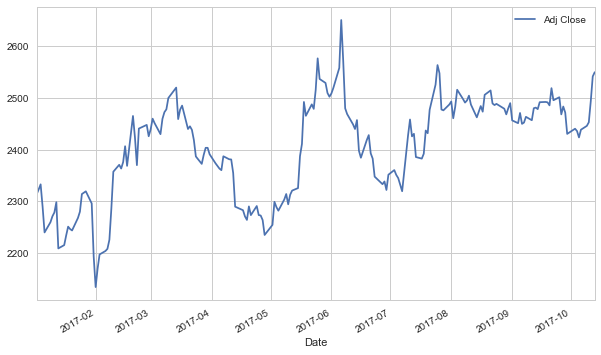

In [146]:
stocks['TCS.BO']['Adj Close'].plot(legend=True,figsize=(10,6))

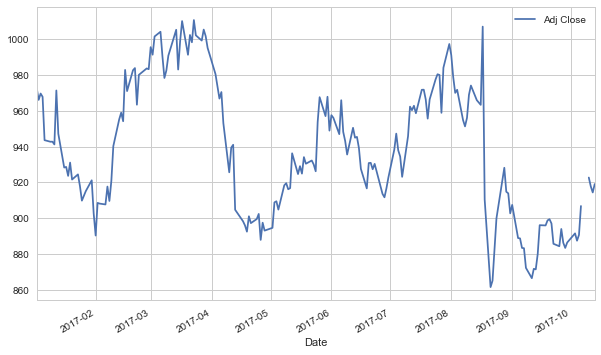

In [147]:
stocks['INFY.BO']['Adj Close'].plot(legend=True,figsize=(10,6))

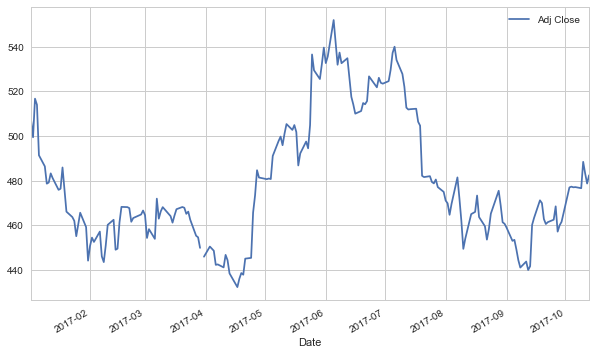

In [148]:
stocks['MINDTREE.BO']['Adj Close'].plot(legend=True,figsize=(10,6))

In [149]:
ma_day = [10,20,50]
for ma in ma_day:
    column_name = " Moving Average for %s days" %(str(ma))
    stocks['TCS.BO'][column_name] = pd.rolling_mean(stocks['TCS.BO']['Adj Close'],ma)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  after removing the cwd from sys.path.
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  after removing the cwd from sys.path.
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()
  after removing the cwd from sys.path.


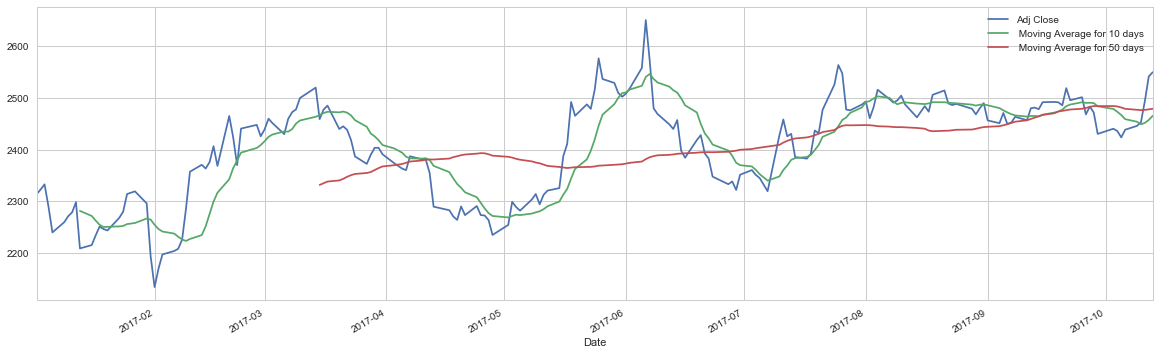

In [150]:
stocks['TCS.BO'][['Adj Close',' Moving Average for 10 days',' Moving Average for 50 days']].plot(figsize=(20,6))

In [151]:
stocks['TCS.BO']['Daily_Return'] = stocks['TCS.BO']['Adj Close'].pct_change()

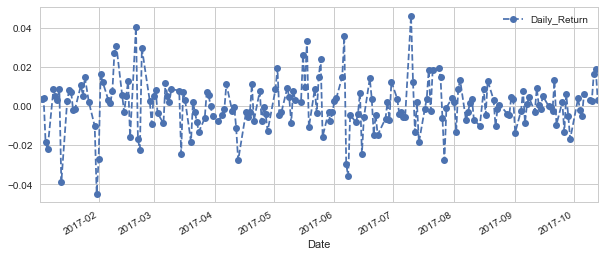

In [152]:
stocks['TCS.BO']['Daily_Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

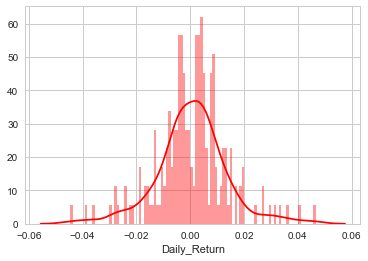

In [153]:
sns.distplot(stocks['TCS.BO']['Daily_Return'].dropna(),bins=100,color='red')

In [154]:
# Portfolio Analysis

tech = ['TCS.BO','INFY.BO','MINDTREE.BO','WIPRO.BO']
closing = pd.DataFrame()
for t in tech:
    closing[t] = wb.DataReader(t,'yahoo',start='2017-01-02',end='2017-10-27')['Adj Close']

In [155]:
closing.head()

,TCS.BO,INFY.BO,MINDTREE.BO,WIPRO.BO
Date,,,,
2017-01-02,2313.535645,972.902161,507.166779,234.248550
2017-01-03,2322.803223,966.151367,499.411774,231.696182
2017-01-04,2332.659180,969.696716,516.688721,235.784943
2017-01-05,2289.508301,967.851196,513.940125,238.064728
2017-01-06,2239.541260,943.616089,491.362274,232.885635


In [156]:
tech_ret = closing.pct_change()

In [157]:
tech_ret.head()

,TCS.BO,INFY.BO,MINDTREE.BO,WIPRO.BO
Date,,,,
2017-01-02,NaN,NaN,NaN,NaN
2017-01-03,0.004006,-0.006939,-0.015291,-0.010896
2017-01-04,0.004243,0.003670,0.034595,0.017647
2017-01-05,-0.018499,-0.001903,-0.005320,0.009669
2017-01-06,-0.021824,-0.025040,-0.043931,-0.021755


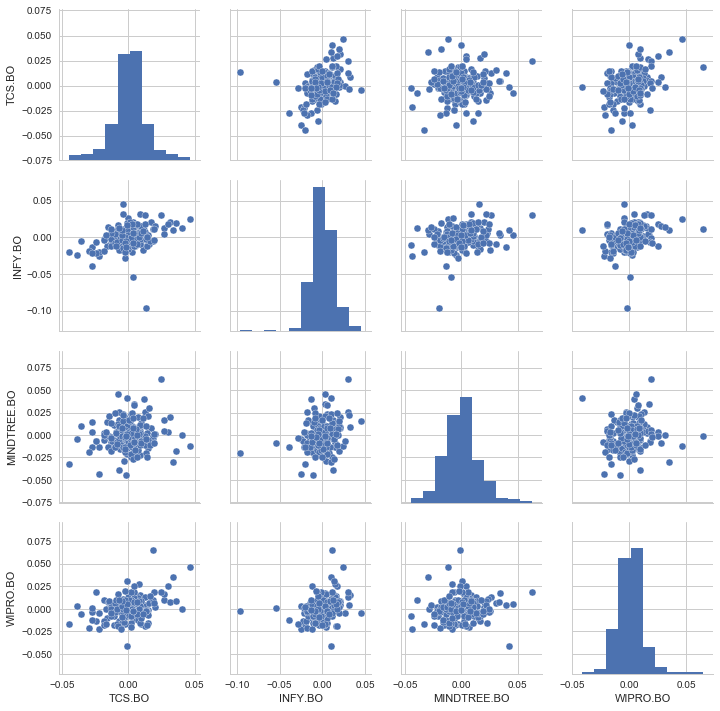

In [158]:
sns.pairplot(tech_ret.dropna())

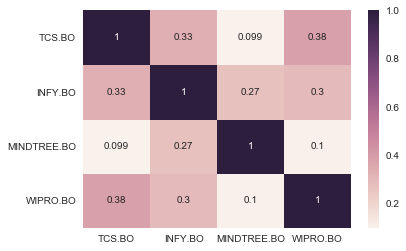

In [159]:
sns.heatmap(tech_ret.corr(),annot=True)

In [160]:
rets = tech_ret.dropna()

In [161]:
rets.std()

TCS.BO         0.013005
INFY.BO        0.014684
MINDTREE.BO    0.015247
WIPRO.BO       0.011963
dtype: float64

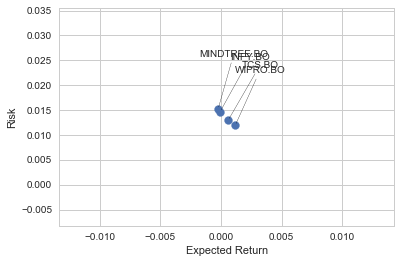

In [162]:
area = np.pi*20
plt.scatter(rets.mean(),rets.std(),s=area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label,x,y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(
    label,
    xy = (x,y), xytext = (50,50),
    textcoords = 'offset points',ha = 'right',va = 'bottom',
    arrowprops = dict(arrowstyle = "-", connectionstyle = 'arc,rad=-3'))